# CSE 6367 Programming Assignment 2 (P2)

## Fall 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Task 1 (30 points) 

Implement Hough transform to detect lines in the image. Superimpose detected lines on the original image.

Note: You shouldn't use cv2.HoughCircles() or any other library fuctions to detect the circles.

<img src = Images/lines.jpg>

In [2]:
# Function implementing Hough Transform to get the accumulator array and thetas and rhos from the image.
def hough_line(image):
    image = np.array(image)
    ny, nx = image.shape
    max_dist = int(np.hypot(nx,ny))
    
    thetas = np.deg2rad(np.arange(-90,90))
    
    rhos = np.linspace(-max_dist, max_dist, 2*max_dist)
    
    accumulator = np.zeros((2*max_dist, len(thetas)))
    
    edge_pixels = np.argwhere(image > 0)
    for pixel in edge_pixels:
        y,x = pixel
        for k, theta in enumerate(thetas):
            r = x *  np.cos(theta) + y * np.sin(theta)
            accumulator[int(r) + max_dist, k] += 1
    return accumulator, thetas, rhos

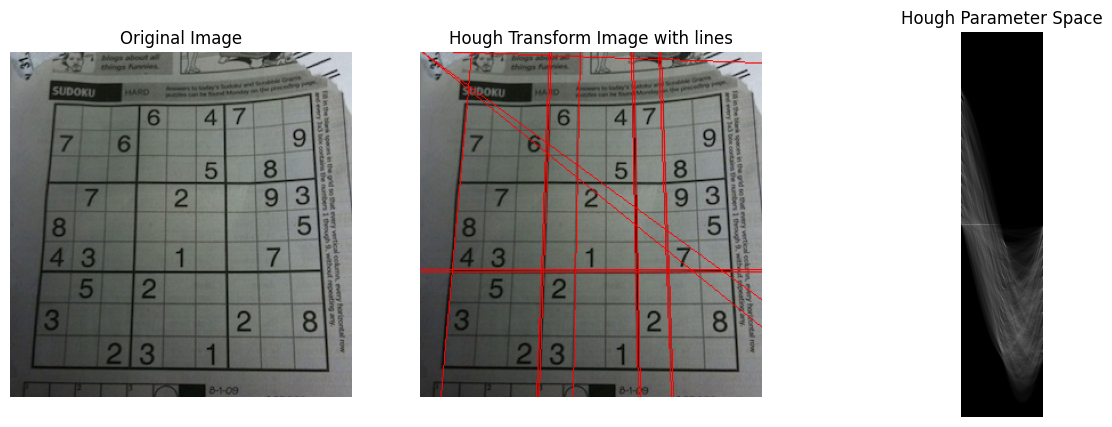

In [3]:
# This function draws detected lines on the original image
def drawHoughLines(original_image, accumulator, thetas, rs, threshold):
    image_with_lines = np.copy(original_image)
    lines = np.argwhere(accumulator >= threshold)
    for r_idx, theta_idx in lines:
        r = rs[r_idx]
        theta = thetas[theta_idx]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * r
        y0 = b * r
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (255, 0, 0), 1)

    return image_with_lines

threshold = 165      # Threshold is gotten from experimentation and I found which one is optimal
image = cv2.imread("./Images/lines.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
canny_image = cv2.Canny(image, 0, 170)     # I have adjusted the parameters for optimal one after experimentation with different values
accumulator, thetas, rs = hough_line(canny_image)
result_image = drawHoughLines(image, accumulator, thetas, rs, threshold)

# Plot the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Hough Transform Image with lines")
plt.imshow(result_image, cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Hough Parameter Space")
plt.imshow(accumulator, cmap="gray")
plt.axis('off')

plt.show()

### Task 2 (30 points) 

Implement Hough transform from scratch to detect circles in the image. Refer to this wiki page for pseudocode(https://en.wikipedia.org/wiki/Circle_Hough_Transform). Superimpose detected circles on the original image.

Note: You shouldn't use cv2.HoughCircles() or any other library fuctions to detect the circles.

<img src = Images/circles.jpg>

In [4]:
# Hough transform to detect circles.
# Please note that this implementation take a lot of time for execution due to it's complexity
# Please wait for up to 5 mins for it to run :) 

In [5]:
# Function for Hough circle transform.
def hough_circle(image, min_radius, max_radius, threshold):
    image = np.array(image)
    height, width = image.shape
    max_radius = min(max_radius, min(height, width))

    
    sin_table = np.sin(np.arange(0, 3 * np.pi, 0.01))
    cos_table = np.cos(np.arange(0, 3 * np.pi, 0.01))

    
    accumulator = np.zeros((height, width, max_radius - min_radius + 1))

    
    edge_pixels = np.argwhere(image > 0)

    for x, y in edge_pixels:
        for radius in range(min_radius, max_radius + 1):
            for angle in range(0, 360):
                a = int(x - radius * cos_table[angle])
                b = int(y - radius * sin_table[angle])
                if 0 <= a < width and 0 <= b < height:
                    accumulator[b, a, radius - min_radius] += 1

    
    circle_centers = np.argwhere(accumulator >= threshold)
    
    return circle_centers + np.array([0, 0, min_radius]), accumulator


In [6]:
# Function to draw detected circles.
def draw_hough_circles(original_image, circle_centers, radius):
    image_with_circles = np.copy(original_image)
    
    for center in circle_centers:
        x, y, r = center
        cv2.circle(image_with_circles, (x, y), r, (255, 0, 0), 2)  # Draw the circle
        
    return image_with_circles

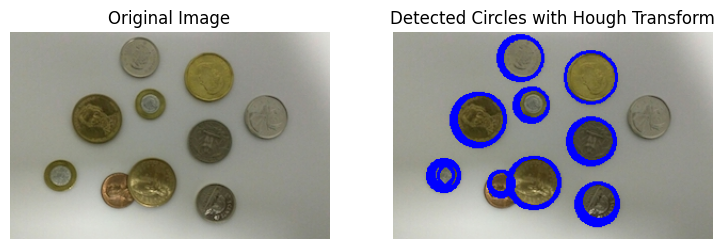

In [7]:
image_original = cv2.imread("./Images/circles.jpg")
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

image = cv2.Canny(image, 120,200)

min_radius = 10 
max_radius = 500
threshold = 200

circle_centers, accumulator = hough_circle(image, min_radius, max_radius, threshold)
result_image = draw_hough_circles(image_original, circle_centers, max_radius)

# Display the original image and the result
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Detected Circles with Hough Transform")
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')


plt.show()

### Task 3 (40 points)

Implement Harris corner detector from scratch. Mark detected corners on original image. 

Note: You shouldn't use cv2.cornerHarris() or any other library functions to detect the corners.

<img src = Images/corners.jpg>

In [8]:
# Harris corner detection

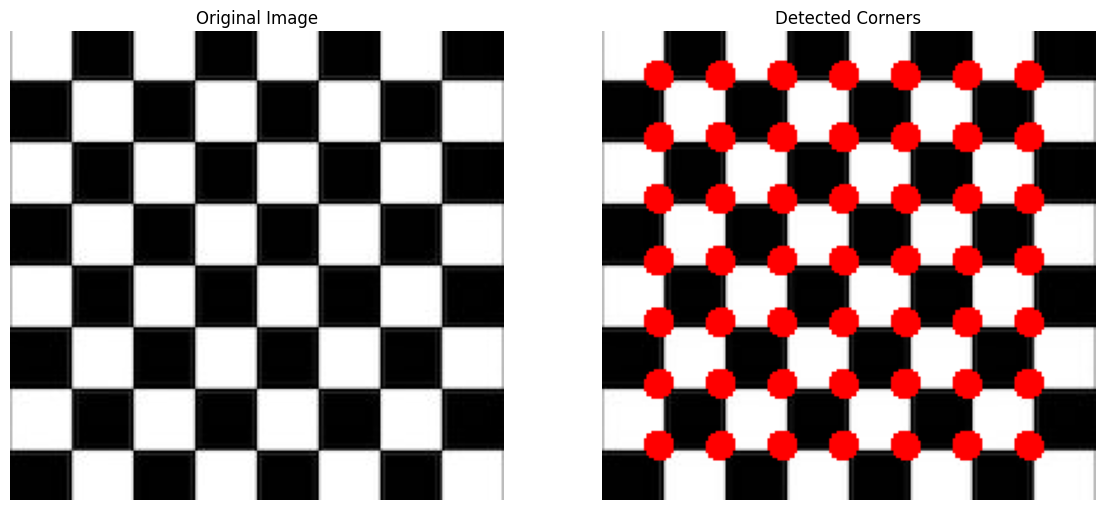

In [9]:
def harris_corner(image_path, window_size, k, threshold):
    image = cv2.imread(image_path)
    copy = image.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    height, width = image.shape
    response_matrix = np.zeros((height, width))
    
    dx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    dx_square = np.square(dx)
    dy_square = np.square(dy)
    dxdy = dx * dy
    
    offset = int(window_size / 2)
    
    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            Sx_square = np.sum(dx_square[y - offset:y + 1 + offset, x - offset: x + 1 + offset])
            Sy_square = np.sum(dy_square[y - offset:y + 1 + offset, x - offset: x + 1 + offset])
            Sxy = np.sum(dxdy[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
            
            H_matrix = np.array([[Sx_square, Sxy], [Sxy, Sy_square]])
            determinant = np.linalg.det(H_matrix)
            trace = np.trace(H_matrix)
            R = determinant - k * (trace ** 2)
            response_matrix[y - offset, x - offset] = R
    
    
    cv2.normalize(response_matrix, response_matrix, 0, 1, cv2.NORM_MINMAX)
    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            value = response_matrix[y,x]
            if value > threshold:
                cv2.circle(copy, (x,y), 3, (0, 0, 255))
    
    plt.figure(figsize=(14,7))
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(image,cmap="gray")
    plt.axis("off")
    
    plt.subplot(1,2,2)
    plt.title("Detected Corners")
    plt.imshow(cv2.cvtColor(copy, cv2.COLOR_BGR2RGB))
    plt.axis("off")
harris_corner("./Images/corners.jpg", window_size=5, k=0.04, threshold=0.30)

## Submission Guidelines:

    Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
    Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.
    You don't need to attach the image file with your submission.
